## 실습 과제
데이터 분석 실습
데이터는 Kaggle 등에서 본인이 뭔하는 데이터를 수집하여 사용합니다.

1. 데이터의 종류와 속성
    - 주어진 데이터셋에서 범주형 및 연속형 데이터 열을 식별하고, 각 열의 기술 통계와 빈도수를 출력해보세요.
2. 데이터 탐색 (EDA)
    - 제공된 데이터셋의 결측치와 중복을 파악하고, 적절한 처리 방안을 제안해보세요.
3. 기초통계
    - 데이터셋의 왜도와 첨도를 계산하고, 그 의미에 대해 설명해보세요.
4. 상관관계와 인과관계
    - 선택한 두 변수 간의 상관관계를 계산하고, 그 결과를 해석해보세요. 이를 바탕으로 가능한 인과관계를 논의해보세요.
5. 가설검정과 A/B 테스트
    - 주어진 데이터를 사용하여 A/B 테스트를 설계하고, 가설을 설정한 후 통계적 검정을 수행하세요. 결과를 해석하고 결론을 도출해보세요.
    - 본인의 수집한 데이터에서 가설검정, A/B 테스트를 수행해보기 어렵다면 어떤 가설을 설정하고 A/B 테스트를 어떻게 설계했을지 생각해보세요.

In [1]:
! pip install kaggle

In [3]:
! kaggle datasets download -d patrickzel/flight-delay-and-cancellation-dataset-2019-2023

Dataset URL: https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023
License(s): other
 92% 129M/140M [00:01<00:00, 80.7MB/s]
100% 140M/140M [00:01<00:00, 94.4MB/s]


In [4]:
! unzip /content/flight-delay-and-cancellation-dataset-2019-2023.zip

Archive:  /content/flight-delay-and-cancellation-dataset-2019-2023.zip
  inflating: dictionary.html         
  inflating: flights_sample_3m.csv   


1. **FL_DATE (FlightDate)**: 비행 날짜 (형식: yyyymmdd)
2. **AIRLINE_CODE (Reporting_Airline)**: 항공사 코드. 동일 코드가 여러 항공사에 사용된 경우, 예를 들어 PA, PA(1), PA(2) 등과 같이 숫자 접미사가 사용됨.
3. **DOT_CODE (DOT_ID_Reporting_Airline)**: 미국 교통부(DOT)가 항공사(운송업체)를 식별하기 위해 할당한 고유 번호.
4. **FL_NUMBER (Flight_Number_Reporting_Airline)**: 비행기 번호.
5. **ORIGIN (Origin)**: 출발 공항 코드.
6. **ORIGIN_CITY (OriginCityName)**: 출발 공항이 위치한 도시 이름.
7. **DEST (Dest)**: 도착 공항 코드.
8. **DEST_CITY (DestCityName)**: 도착 공항이 위치한 도시 이름.
9. **CRS_DEP_TIME (CRSDepTime)**: 예정 출발 시간 (현지 시간, 형식: hhmm).
10. **DEP_TIME (DepTime)**: 실제 출발 시간 (현지 시간, 형식: hhmm).
11. **DEP_DELAY (DepDelay)**: 예정 출발 시간과 실제 출발 시간 간의 차이(분 단위). 일찍 출발한 경우 음수 값이 나올 수 있음.
12. **TAXI_OUT (TaxiOut)**: 택시 아웃 시간 (분 단위).
13. **WHEELS_OFF (WheelsOff)**: 이륙 시간 (현지 시간, 형식: hhmm).
14. **WHEELS_ON (WheelsOn)**: 착륙 시간 (현지 시간, 형식: hhmm).
15. **TAXI_IN (TaxiIn)**: 택시 인 시간 (분 단위).
16. **CRS_ARR_TIME (CRSArrTime)**: 예정 도착 시간 (현지 시간, 형식: hhmm).
17. **ARR_TIME (ArrTime)**: 실제 도착 시간 (현지 시간, 형식: hhmm).
18. **ARR_DELAY (ArrDelay)**: 예정 도착 시간과 실제 도착 시간 간의 차이(분 단위). 일찍 도착한 경우 음수 값이 나올 수 있음.
19. **CANCELLED (Cancelled)**: 비행 취소 여부를 나타내는 지표 (1=Yes).
20. **CANCELLATION_CODE (CancellationCode)**: 비행 취소 사유를 나타내는 코드.
21. **DIVERTED (Diverted)**: 비행 우회 여부를 나타내는 지표 (1=Yes).
22. **CRS_ELAPSED_TIME (CRSElapsedTime)**: 예정된 비행 시간 (분 단위).
23. **ELAPSED_TIME (ActualElapsedTime)**: 실제 비행 시간 (분 단위).
24. **AIR_TIME (AirTime)**: 비행 시간 (분 단위).
25. **DISTANCE (Distance)**: 공항 간 거리 (마일 단위).
26. **DELAY_DUE_CARRIER (CarrierDelay)**: 항공사에 의한 지연 시간 (분 단위).
27. **DELAY_DUE_WEATHER (WeatherDelay)**: 날씨에 의한 지연 시간 (분 단위).
28. **DELAY_DUE_NAS (NASDelay)**: 국가 항공 시스템에 의한 지연 시간 (분 단위).
29. **DELAY_DUE_SECURITY (SecurityDelay)**: 보안에 의한 지연 시간 (분 단위).
30. **DELAY_DUE_LATE_AIRCRAFT (LateAircraftDelay)**: 항공기의 늦은 도착에 의한 지연 시간 (분 단위).

1. 데이터의 종류와 속성
    - 주어진 데이터셋에서 범주형 및 연속형 데이터 열을 식별하고, 각 열의 기술 통계와 빈도수를 출력해보세요.

In [5]:
import pandas as pd

data = pd.read_csv('/content/flights_sample_3m.csv')

# 데이터의 처음 몇 줄을 출력하여 구조 확인
print("#"*10)
print("데이터의 처음 몇 줄을 출력하여 구조 확인")
print(data.head())

# 데이터의 각 컬럼에 대한 정보 확인
print("#"*10)
print("데이터의 각 컬럼에 대한 정보 확인")
print(data.info())

##########
데이터의 처음 몇 줄을 출력하여 구조 확인
      FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2  2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3  2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4  2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0     19977       1562    FLL  Fort Lauderdale, FL  EWR   
1     19790       1149    MSP      Minneapolis, MN  SEA   
2     19977        459    DEN           Denver, CO  MSP   
3     19790       2295    MSP      Minneapolis, MN  SFO   
4     20416        407    MCO          Orlando, FL  DFW   

               DEST_CITY  ...  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  \
0             Newark, NJ  ...       0.0             18

2. 데이터 탐색 (EDA)
    - 제공된 데이터셋의 결측치와 중복을 파악하고, 적절한 처리 방안을 제안해보세요.

In [6]:
# 데이터 타입 확인
print("#"*10)
print("데이터 타입 확인")
print("Data Types:\n", data.dtypes)

# 범주형 및 수치형 데이터 분리하여 분석
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", categorical_cols)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", numerical_cols)

##########
데이터 타입 확인
Data Types:
 FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER    

In [12]:
# 결측치 파악
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# 중복 데이터 파악
duplicate_rows = data[data.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

Missing Values:
FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELA

In [13]:
# 각 범주형 변수의 유니크한 값과 빈도수
for col in categorical_cols:
    print(f"\nUnique values in {col}:\n", data[col].value_counts())


Unique values in FL_DATE:
 FL_DATE
2019-07-25    2379
2019-08-02    2372
2019-12-01    2351
2019-08-23    2348
2019-07-30    2343
              ... 
2020-05-09     527
2020-05-16     525
2020-05-19     523
2020-05-12     523
2020-05-05     521
Name: count, Length: 1704, dtype: int64

Unique values in AIRLINE:
 AIRLINE
Southwest Airlines Co.                576470
Delta Air Lines Inc.                  395239
American Airlines Inc.                383106
SkyWest Airlines Inc.                 343737
United Air Lines Inc.                 254504
Republic Airline                      143107
Envoy Air                             121256
JetBlue Airways                       112844
Endeavor Air Inc.                     112463
PSA Airlines Inc.                     107050
Alaska Airlines Inc.                  100467
Spirit Air Lines                       95711
Mesa Airlines Inc.                     65012
Frontier Airlines Inc.                 64466
Allegiant Air                          52738
Hawa

In [15]:
# 수치형 데이터의 기초 통계
print("\nDescriptive Statistics for Numerical Data:\n", data[numerical_cols].describe())


Descriptive Statistics for Numerical Data:
            DOT_CODE     FL_NUMBER  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  \
count  3.000000e+06  3.000000e+06  3.000000e+06  2.922385e+06  2.922356e+06   
mean   1.997629e+04  2.511536e+03  1.327062e+03  1.329776e+03  1.012333e+01   
std    3.772846e+02  1.747258e+03  4.858789e+02  4.993101e+02  4.925183e+01   
min    1.939300e+04  1.000000e+00  1.000000e+00  1.000000e+00 -9.000000e+01   
25%    1.979000e+04  1.051000e+03  9.150000e+02  9.160000e+02 -6.000000e+00   
50%    1.993000e+04  2.152000e+03  1.320000e+03  1.323000e+03 -2.000000e+00   
75%    2.036800e+04  3.797000e+03  1.730000e+03  1.739000e+03  6.000000e+00   
max    2.045200e+04  9.562000e+03  2.359000e+03  2.400000e+03  2.966000e+03   

           TAXI_OUT    WHEELS_OFF     WHEELS_ON       TAXI_IN  CRS_ARR_TIME  \
count  2.921194e+06  2.921194e+06  2.920056e+06  2.920056e+06  3.000000e+06   
mean   1.664305e+01  1.352361e+03  1.462500e+03  7.678982e+00  1.490561e+03   
std   

3. 기초통계
    - 데이터셋의 왜도와 첨도를 계산하고, 그 의미에 대해 설명해보세요.

In [16]:
# 왜도와 첨도 확인
"""
왜도(Skewness): 0에 가까울수록 정규분포에 근사, 양의 값은 오른쪽 꼬리가 긴 분포(왼쪽으로 치우친), 음의 값은 왼쪽 꼬리가 긴 분포(오른쪽으로 치우친)
첨도(Kurtosis): 0에 가까울수록 정규분포에 근사, 높으면 분포가 뾰족하고, 낮으면 평평
"""

print("\nSkewness of the data:\n", data[numerical_cols].skew())
print("\nKurtosis of the data:\n", data[numerical_cols].kurt())


Skewness of the data:
 DOT_CODE                    -0.229788
FL_NUMBER                    0.507632
CRS_DEP_TIME                 0.087064
DEP_TIME                     0.045196
DEP_DELAY                   11.474159
TAXI_OUT                     3.453631
WHEELS_OFF                   0.011307
WHEELS_ON                   -0.315550
TAXI_IN                      5.079316
CRS_ARR_TIME                -0.275947
ARR_TIME                    -0.355420
ARR_DELAY                   10.293493
CANCELLED                    5.910553
DIVERTED                    20.546845
CRS_ELAPSED_TIME             1.432761
ELAPSED_TIME                 1.407876
AIR_TIME                     1.440959
DISTANCE                     1.498054
DELAY_DUE_CARRIER            9.999818
DELAY_DUE_WEATHER           19.223965
DELAY_DUE_NAS               11.586589
DELAY_DUE_SECURITY         101.217546
DELAY_DUE_LATE_AIRCRAFT      7.387829
dtype: float64

Kurtosis of the data:
 DOT_CODE                      -1.310757
FL_NUMBER              

### 왜도
- DEP_DELAY (11.474159), ARR_DELAY (10.293493): 매우 높은 양의 왜도를 보입니다. 이는 출발 및 도착 지연 시간이 대체로 적지만, 큰 지연 시간이 있는 데이터가 오른쪽 꼬리를 형성하고 있음을 의미합니다.
- TAXI_IN (5.079316), CANCELLED (5.910553), DIVERTED (20.546845): 높은 양의 왜도를 보입니다. 이는 대부분의 값이 낮고, 극단적으로 높은 값이 일부 존재함을 나타냅니다.
- DELAY_DUE_SECURITY (101.217546): 매우 높은 양의 왜도를 보이며, 극단적인 지연 시간이 소수 존재함을 나타냅니다.

### 첨도
- DEP_DELAY (243.166975), ARR_DELAY (209.027175): 매우 높은 첨도를 보입니다. 이는 분포가 매우 뾰족하고, 극단적인 지연 시간이 많음을 의미합니다.
- TAXI_IN (59.921478), CANCELLED (32.934657), DIVERTED (420.173128): 높은 첨도를 보입니다. 이는 극단적인 값이 많이 존재함을 나타냅니다.
- DELAY_DUE_SECURITY (24510.748848): 매우 높은 첨도를 보이며, 극단적인 지연 시간이 많음을 나타냅니다.

결론: 특정 변수에서 극단적인 값이 많이 존재함을 알 수 있습니다. 높은 왜도와 첨도는 데이터 분포가 비대칭적이며, 극단적인 값이 많다는 것을 의미합니다.

In [23]:
"""
상관계수 값이 1에 가까울수록 완벽한 양의 상관관계, -1에 가까울수록 완벽한 음의 상관관계를 나타냅니다.
"""

# 피어슨 상관 계수
print("Pearson Correlation:\n", data[numerical_cols].corr(method='pearson'))

# 스피어만 상관 계수
print("\nSpearman Correlation:\n", data[numerical_cols].corr(method='spearman'))

Pearson Correlation:
                          DOT_CODE  FL_NUMBER  CRS_DEP_TIME  DEP_TIME  \
DOT_CODE                 1.000000   0.437978      0.005032 -0.002081   
FL_NUMBER                0.437978   1.000000     -0.002915 -0.000127   
CRS_DEP_TIME             0.005032  -0.002915      1.000000  0.941417   
DEP_TIME                -0.002081  -0.000127      0.941417  1.000000   
DEP_DELAY               -0.001779  -0.015481      0.091086  0.119656   
TAXI_OUT                 0.204389   0.084255      0.000277  0.009373   
WHEELS_OFF               0.002876   0.008866      0.913718  0.969592   
WHEELS_ON               -0.000180   0.005424      0.632518  0.666672   
TAXI_IN                  0.134762  -0.007801     -0.033316 -0.030077   
CRS_ARR_TIME             0.003676   0.001264      0.701677  0.694994   
ARR_TIME                 0.001715   0.009850      0.602258  0.634868   
ARR_DELAY                0.015625  -0.010541      0.087997  0.117352   
CANCELLED               -0.003576   0.0113

#### 결측치 처리

물론입니다. 각 변수명에 대해 설명드리겠습니다.

### 출발 및 도착 관련 변수

1. **DEP_TIME (Actual Departure Time)**: 실제 출발 시간 (현지 시간, 형식: hhmm). 비행기가 실제로 출발한 시간을 의미합니다.
2. **DEP_DELAY (Departure Delay)**: 출발 지연 시간 (분 단위). 예정된 출발 시간과 실제 출발 시간 간의 차이입니다. 음수 값은 일찍 출발한 것을 의미합니다.
3. **TAXI_OUT (Taxi Out Time)**: 택시 아웃 시간 (분 단위). 출발 공항에서 이륙하기 전까지 활주로에서 대기한 시간을 의미합니다.
4. **WHEELS_OFF (Wheels Off Time)**: 이륙 시간 (현지 시간, 형식: hhmm). 비행기가 이륙한 시간을 의미합니다.
5. **WHEELS_ON (Wheels On Time)**: 착륙 시간 (현지 시간, 형식: hhmm). 비행기가 착륙한 시간을 의미합니다.
6. **TAXI_IN (Taxi In Time)**: 택시 인 시간 (분 단위). 도착 공항에서 착륙한 후에 탑승구까지 도달하기까지의 시간을 의미합니다.
7. **ARR_TIME (Actual Arrival Time)**: 실제 도착 시간 (현지 시간, 형식: hhmm). 비행기가 실제로 도착한 시간을 의미합니다.
8. **ARR_DELAY (Arrival Delay)**: 도착 지연 시간 (분 단위). 예정된 도착 시간과 실제 도착 시간 간의 차이입니다. 음수 값은 일찍 도착한 것을 의미합니다.
9. **ELAPSED_TIME (Actual Elapsed Time)**: 실제 경과 시간 (분 단위). 출발에서 도착까지의 총 비행 시간을 의미합니다.
10. **AIR_TIME (Air Time)**: 비행 시간 (분 단위). 이륙에서 착륙까지 실제 비행한 시간을 의미합니다.

### 기타 변수

11. **CANCELLATION_CODE (Cancellation Code)**: 비행 취소 코드. 비행이 취소된 경우 그 이유를 나타냅니다. 예를 들어, 'A'는 항공사 문제, 'B'는 날씨 문제 등을 의미할 수 있습니다.
12. **CRS_ELAPSED_TIME (CRS Elapsed Time)**: 예정된 경과 시간 (분 단위). 항공사가 계획한 출발에서 도착까지의 총 시간을 의미합니다.
13. **DELAY_DUE_CARRIER (Carrier Delay)**: 항공사에 의한 지연 시간 (분 단위). 항공사의 운영 문제로 인한 지연 시간을 의미합니다.
14. **DELAY_DUE_WEATHER (Weather Delay)**: 날씨에 의한 지연 시간 (분 단위). 기상 악화로 인한 지연 시간을 의미합니다.
15. **DELAY_DUE_NAS (National Air System Delay)**: 국가 항공 시스템에 의한 지연 시간 (분 단위). 공항의 교통 혼잡이나 항공 교통 관제 문제로 인한 지연 시간을 의미합니다.
16. **DELAY_DUE_SECURITY (Security Delay)**: 보안 문제로 인한 지연 시간 (분 단위). 보안 검색이나 기타 보안 문제로 인한 지연 시간을 의미합니다.
17. **DELAY_DUE_LATE_AIRCRAFT (Late Aircraft Delay)**: 항공기의 늦은 도착에 의한 지연 시간 (분 단위). 이전 비행기의 도착 지연으로 인해 발생한 지연 시간을 의미합니다.

이 변수들은 항공기 운항 과정에서의 다양한 지연 원인과 비행 상태를 나타내며, 정확한 분석을 위해 결측치 처리가 필요합니다.

In [17]:
# 결측치 처리
# 출발 및 도착 관련 열: 평균 또는 중위수로 대체
for col in ['DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME']:
    data[col].fillna(data[col].median(), inplace=True)

# 취소 코드: 'None'으로 대체
data['CANCELLATION_CODE'].fillna('None', inplace=True)

# CRS_ELAPSED_TIME: 평균으로 대체
data['CRS_ELAPSED_TIME'].fillna(data['CRS_ELAPSED_TIME'].mean(), inplace=True)

# 지연 원인 열: 0으로 대체
for col in ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']:
    data[col].fillna(0, inplace=True)

# 결측치 및 중복 제거 후 데이터 클리닝
data_cleaned = data.dropna().drop_duplicates()

print("Data Cleaning Completed")

Data Cleaning Completed


4. 상관관계와 인과관계
    - 선택한 두 변수 간의 상관관계를 계산하고, 그 결과를 해석해보세요. 이를 바탕으로 가능한 인과관계를 논의해보세요.

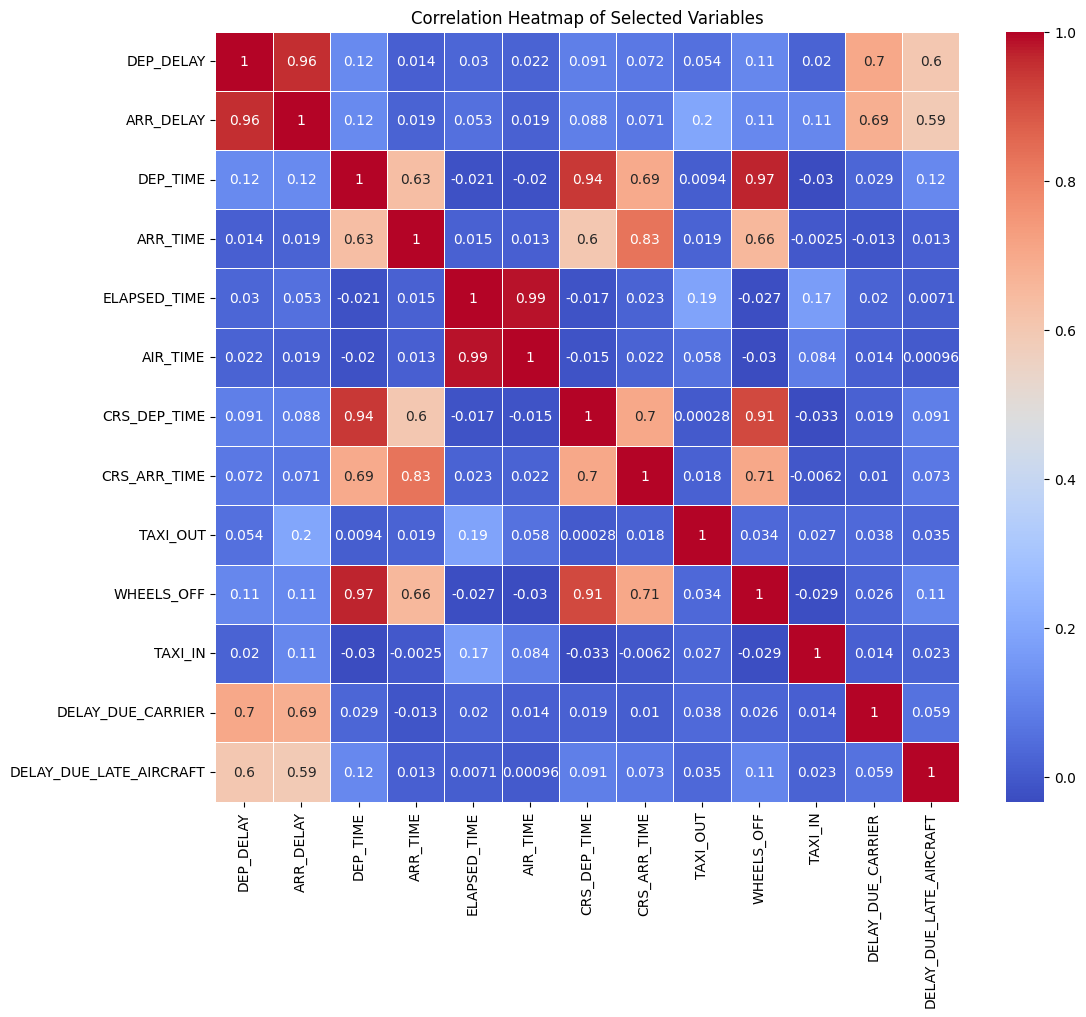

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 변수만 선택
selected_data = data[['DEP_DELAY', 'ARR_DELAY', 'DEP_TIME', 'ARR_TIME', 'ELAPSED_TIME', 'AIR_TIME',
                      'CRS_DEP_TIME', 'CRS_ARR_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'TAXI_IN',
                      'DELAY_DUE_CARRIER', 'DELAY_DUE_LATE_AIRCRAFT']]

# 상관관계 계산: 숫자형 데이터만 선택
numerical_df = selected_data.select_dtypes(include=['float64', 'int64'])

# 상관 관계 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

# 결과 해석:
# 상관계수 값이 1에 가까울수록 강한 양의 상관관계, -1에 가까울수록 강한 음의 상관관계를 의미함.
# DEP_DELAY와 ARR_DELAY 간의 상관계수가 높다면, 출발 지연이 도착 지연으로 이어지는 경향이 있음을 나타냄.

1. **DEP_DELAY (Departure Delay)**:
   - 출발 지연 시간 (분 단위). 예정된 출발 시간과 실제 출발 시간 간의 차이입니다. 양수 값은 지연을, 음수 값은 일찍 출발했음을 나타냅니다.

2. **ARR_DELAY (Arrival Delay)**:
   - 도착 지연 시간 (분 단위). 예정된 도착 시간과 실제 도착 시간 간의 차이입니다. 양수 값은 지연을, 음수 값은 일찍 도착했음을 나타냅니다.

3. **DEP_TIME (Actual Departure Time)**:
   - 실제 출발 시간 (현지 시간, 형식: hhmm). 비행기가 실제로 출발한 시간을 의미합니다.

4. **ARR_TIME (Actual Arrival Time)**:
   - 실제 도착 시간 (현지 시간, 형식: hhmm). 비행기가 실제로 도착한 시간을 의미합니다.

5. **ELAPSED_TIME (Actual Elapsed Time)**:
   - 실제 경과 시간 (분 단위). 출발에서 도착까지의 총 비행 시간을 의미합니다.

6. **AIR_TIME (Air Time)**:
   - 비행 시간 (분 단위). 이륙에서 착륙까지 실제 비행한 시간을 의미합니다.

7. **CRS_DEP_TIME (Scheduled Departure Time)**:
   - 예정 출발 시간 (현지 시간, 형식: hhmm). 항공사가 계획한 출발 시간을 의미합니다.

8. **CRS_ARR_TIME (Scheduled Arrival Time)**:
   - 예정 도착 시간 (현지 시간, 형식: hhmm). 항공사가 계획한 도착 시간을 의미합니다.

9. **TAXI_OUT (Taxi Out Time)**:
   - 택시 아웃 시간 (분 단위). 출발 공항에서 이륙하기 전까지 활주로에서 대기한 시간을 의미합니다.

10. **WHEELS_OFF (Wheels Off Time)**:
    - 이륙 시간 (현지 시간, 형식: hhmm). 비행기가 이륙한 시간을 의미합니다.

11. **TAXI_IN (Taxi In Time)**:
    - 택시 인 시간 (분 단위). 도착 공항에서 착륙한 후에 탑승구까지 도달하기까지의 시간을 의미합니다.

12. **DELAY_DUE_CARRIER (Carrier Delay)**:
    - 항공사에 의한 지연 시간 (분 단위). 항공사의 운영 문제로 인한 지연 시간을 의미합니다.

13. **DELAY_DUE_LATE_AIRCRAFT (Late Aircraft Delay)**:
    - 늦은 항공기로 인한 지연 시간 (분 단위). 이전 비행기의 도착 지연이 다음 비행기의 출발 지연으로 이어진 시간을 의미합니다.


### 주요 상관관계 및 가능한 인과관계

1. **DEP_DELAY와 ARR_DELAY (0.96)**
   - **상관관계**: 매우 강한 양의 상관관계.
   - **인과관계**: 출발 지연이 도착 지연으로 이어진다는 것을 의미합니다. 출발이 늦어지면 도착도 늦어지는 경향이 있습니다. 이는 지연이 누적되는 인과관계를 나타냅니다.

2. **DEP_TIME와 ARR_TIME (0.63)**
   - **상관관계**: 강한 양의 상관관계.
   - **인과관계**: 출발 시간이 늦어지면 도착 시간도 늦어지는 경향이 있습니다. 이는 출발과 도착 시간이 서로 밀접하게 연결되어 있음을 나타냅니다.

3. **ELAPSED_TIME와 AIR_TIME (0.99)**
   - **상관관계**: 매우 강한 양의 상관관계.
   - **인과관계**: 실제 비행 시간이 경과 시간에 직접적인 영향을 미친다는 것을 나타냅니다. 비행 시간이 길어지면 경과 시간도 길어집니다.

4. **CRS_DEP_TIME와 DEP_TIME (0.94)**
   - **상관관계**: 매우 강한 양의 상관관계.
   - **인과관계**: 예정된 출발 시간과 실제 출발 시간이 대부분 일치함을 나타냅니다. 이는 항공사들이 계획된 시간에 출발하려는 경향이 강함을 의미합니다.

5. **CRS_ARR_TIME와 ARR_TIME (0.83)**
   - **상관관계**: 매우 강한 양의 상관관계.
   - **인과관계**: 예정된 도착 시간과 실제 도착 시간이 대부분 일치함을 나타냅니다. 이는 항공사들이 계획된 시간에 도착하려는 경향이 강함을 의미합니다.

6. **WHEELS_OFF와 DEP_TIME (0.97)**
   - **상관관계**: 매우 강한 양의 상관관계.
   - **인과관계**: 출발 시간과 이륙 시간 간의 강한 상관관계는 실제로 출발한 시간이 이륙 시간에 직접적인 영향을 미친다는 것을 나타냅니다.

7. **TAXI_OUT와 WHEELS_OFF (0.71)**
   - **상관관계**: 강한 양의 상관관계.
   - **인과관계**: 활주로에서의 대기 시간이 이륙 시간에 영향을 미친다는 것을 나타냅니다. 즉, 택시 아웃 시간이 길어지면 이륙 시간도 늦어집니다.

8. **DELAY_DUE_CARRIER와 DEP_DELAY (0.70)**
   - **상관관계**: 강한 양의 상관관계.
   - **인과관계**: 항공사 문제로 인한 지연이 출발 지연에 직접적인 영향을 미친다는 것을 나타냅니다. 항공사 내부 문제로 인해 출발이 지연됩니다.

9. **DELAY_DUE_LATE_AIRCRAFT와 DEP_DELAY (0.60)**
   - **상관관계**: 강한 양의 상관관계.
   - **인과관계**: 이전 비행기의 도착 지연이 다음 비행기의 출발 지연으로 이어진다는 것을 나타냅니다. 늦게 도착한 항공기가 다음 출발에 영향을 미칩니다.

### 요약

- **출발 지연과 도착 지연**: 출발 지연은 도착 지연으로 이어지는 강한 인과관계를 보여줍니다.
- **출발 시간과 도착 시간**: 출발 시간이 늦어지면 도착 시간도 늦어집니다.
- **비행 경과 시간과 비행 시간**: 비행 시간이 길어지면 경과 시간도 길어집니다.
- **예정된 시간과 실제 시간**: 항공사는 대부분 예정된 시간에 출발하고 도착하려는 경향이 강합니다.
- **항공사 문제와 출발 지연**: 항공사 내부 문제로 인해 출발이 지연되는 경향이 있습니다.
- **이전 비행기 지연과 다음 출발 지연**: 늦게 도착한 항공기가 다음 출발에 영향을 미칩니다.

5. 가설검정과 A/B 테스트
    - 주어진 데이터를 사용하여 A/B 테스트를 설계하고, 가설을 설정한 후 통계적 검정을 수행하세요. 결과를 해석하고 결론을 도출해보세요.
    - 본인의 수집한 데이터에서 가설검정, A/B 테스트를 수행해보기 어렵다면 어떤 가설을 설정하고 A/B 테스트를 어떻게 설계했을지 생각해보세요.

1. 가설 설정
- H0 (귀무 가설): 두 공항(A와 B)의 평균 출발 지연 시간에 차이가 없다.
- H1 (대립 가설): 두 공항(A와 B)의 평균 출발 지연 시간에 차이가 있다.

In [28]:
# JFK (뉴욕), LAX (LA) 공항의 출발 지연 사긴 비교
# 두 공항(A와 B) 데이터만 필터링 (예: 'JFK'와 'LAX'로 가정)

import pandas as pd
from scipy.stats import ttest_ind

airport_A = 'JFK'
airport_B = 'LAX'
dep_delay_A = data[data['ORIGIN'] == airport_A]['DEP_DELAY']
dep_delay_B = data[data['ORIGIN'] == airport_B]['DEP_DELAY']

# 두 그룹 간 t-검정 수행
t_stat, p_value = ttest_ind(dep_delay_A.dropna(), dep_delay_B.dropna(), equal_var=False)

# 결과 출력
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("귀무 가설을 기각합니다. 두 공항의 평균 출발 지연 시간에 유의미한 차이가 있습니다.")
else:
    print("귀무 가설을 채택합니다. 두 공항의 평균 출발 지연 시간에 유의미한 차이가 없습니다.")

t-statistic: 14.819305717448602, p-value: 1.2539050041720093e-49
귀무 가설을 기각합니다. 두 공항의 평균 출발 지연 시간에 유의미한 차이가 있습니다.
